### Updating contextily

### I was having issues (Feb '23) with contextily's tile fetching as docmented [here](https://discuss.python.org/t/cannot-identify-image-file-io-bytesio-object/39127). I kept getting this error: `UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x775307383ce0>`

### They made some updates and I reinstalled the package and dependecies using: `conda install contextily --channel conda-forge` which yielded the following:


-------------------------------------------------------------------------------------------------------

Collecting package metadata (current_repodata.json): done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 23.11.0

Please update conda by running

    $ conda update -n base conda

Package Plan 

  environment location: /home/millieginty/anaconda3/envs/geo_env

  added / updated specs:
    - contextily


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.2.2   |       hbcca054_0         152 KB  conda-forge
    certifi-2024.2.2           |     pyhd8ed1ab_0         157 KB  conda-forge
    contextily-1.5.0           |     pyhd8ed1ab_0          20 KB  conda-forge
    openssl-1.1.1w             |       hd590300_0         1.9 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.2 MB

The following packages will be UPDATED:

  ca-certificates                      2022.9.14-ha878542_0 --> 2024.2.2-hbcca054_0
  certifi                            2022.9.14-pyhd8ed1ab_0 --> 2024.2.2-pyhd8ed1ab_0
  contextily                             1.2.0-pyhd8ed1ab_0 --> 1.5.0-pyhd8ed1ab_0
  openssl                                 1.1.1q-h166bdaf_0 --> 1.1.1w-hd590300_0



Downloading and Extracting Packages
certifi-2024.2.2     | 157 KB    | ##################################### | 100% 
contextily-1.5.0     | 20 KB     | ##################################### | 100% 
openssl-1.1.1w       | 1.9 MB    | ##################################### | 100% 
ca-certificates-2024 | 152 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.

w: -105.3014509
s: 39.9643513
e: -105.1780988
n: 40.094409
place: Boulder, Boulder County, Colorado, United States
zoom: 13
n_tiles: 1


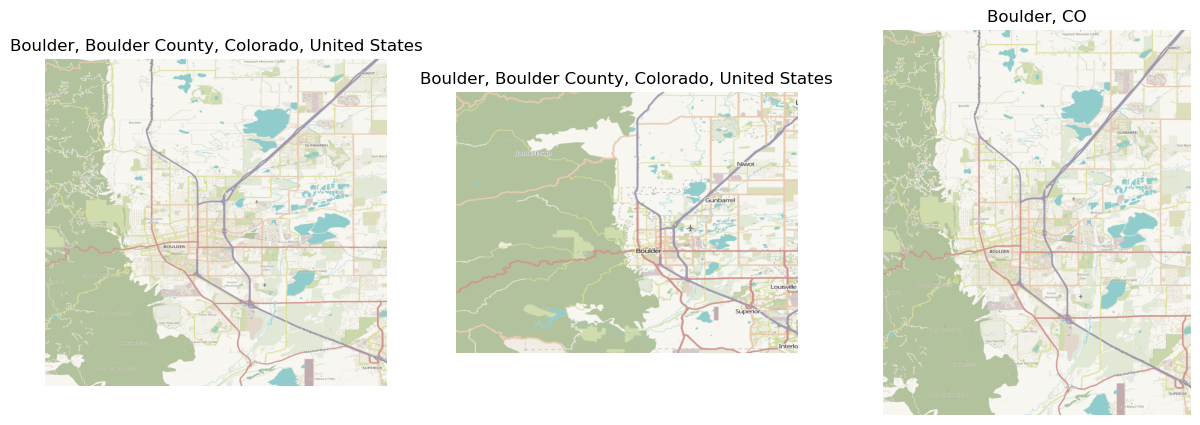

In [1]:
"""
Downloading and Plotting Maps
-----------------------------

Plotting maps with Contextily.

Contextily is designed to pull map tile information from the web. In many
cases we want to go from a location to a map of that location as quickly
as possible. There are two main ways to do this with Contextily.

Searching for places with text
==============================

The simplest approach is to search for a location with text. You can do
this with the ``Place`` class. This will return an object that contains
metadata about the place, such as its bounding box. It will also contain an
image of the place.
"""
import numpy as np
import matplotlib.pyplot as plt
import contextily as cx

# The following fix added from https://github.com/python-pillow/Pillow/issues/3431 from 2018
#import io
#import requests
#from PIL import Image
#r = requests.get('https://stamen-tiles-{s}.a.ssl.fastly.net/{variant}/{z}/{x}/{y}{r}.{ext}', stream=True)
#+
#aux_im = Image.open(io.BytesIO(r.content))
# End fix

loc = cx.Place("boulder", zoom_adjust=0)  # zoom_adjust modifies the auto-zoom

# Print some metadata
for attr in ["w", "s", "e", "n", "place", "zoom", "n_tiles"]:
    print("{}: {}".format(attr, getattr(loc, attr)))

# Show the map
im1 = loc.im

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
cx.plot_map(loc, ax=axs[0])

###############################################################################
# The zoom level will be chosen for you by default, though you can specify
# this manually as well:

loc2 = cx.Place("boulder", zoom=11)
cx.plot_map(loc2, ax=axs[1])

###############################################################################
# Downloading tiles from bounds
# =============================
#
# You can also grab tile information directly from a bounding box + zoom level.
# This is demoed below:

im2, bbox = cx.bounds2img(loc.w, loc.s, loc.e, loc.n, zoom=loc.zoom, ll=True)
cx.plot_map(im2, bbox, ax=axs[2], title="Boulder, CO")

plt.show()